# Regularization 

## Initialization

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import deque
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Data Generation

In [14]:
np.random.seed(42)
N = 1000
X = np.random.randn(N , 1)
noise = 5 * np.random.randn(N , 1)
y = 1 - 2 * X + X ** 2 - 0.5 * X ** 3 + noise

## Design Matrix Creating - Polynomial mapping


In [15]:
def polynomial(X, degree):
    phi = deque()
    for k in range(1, degree + 1):
        regressor = X ** k
        phi.append(regressor)
    return np.array(phi).T.reshape((len(X), degree))

phi_x = polynomial(X, 15)

## Train - Test spliting and Normalization

In [16]:
X_train, X_test, y_train, y_test = train_test_split(phi_x, y, test_size=0.2)
one_vectors_tr = np.ones((len(X_train), 1))
one_vector_te = np.ones((len(X_test), 1))
scaler_input = MinMaxScaler().fit(X_train)
X_train, X_test = scaler_input.fit_transform(X_train), scaler_input.fit_transform(X_test)
scaler_output = MinMaxScaler().fit(y_train)
y_train, y_test = scaler_output.fit_transform(y_train), scaler_output.fit_transform(y_test)
X_train, X_test = np.hstack((one_vectors_tr, X_train)), np.hstack((one_vector_te, X_test))

## Least Square Solution 

In [17]:
def least_square(X_train, y_train):
    X_T_X_train = np.matmul(X_train.T, X_train)
    X_T_Y_train = np.matmul(X_train.T, y_train)
    W = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
    return W

## Prediction 

In [18]:
def predict(X_test, W):
    y_pre = np.matmul(X_test, W)
    return y_pre

## Metrics

In [19]:
def mse_error(y_pre, y_true):
    error = (y_pre-y_true)**2
    return np.mean(error)

## L2 Regularization

In [20]:
def l2_regularization(X_train, y_train, landa=0.1):
    X_T_X_train = np.matmul(X_train.T, X_train)
    X_T_Y_train = np.matmul(X_train.T, y_train)
    W = np.matmul(np.linalg.inv(X_T_X_train + landa*np.eye(len(X_T_X_train))), X_T_Y_train)
    return W

[[ 1.90961534e+00]
 [-1.33048329e-01]
 [ 4.38355718e-01]
 [-2.89536506e+00]
 [-3.17111075e+00]
 [-3.44964180e+01]
 [ 2.43822298e+01]
 [ 6.04656654e+02]
 [-4.70206833e+01]
 [-3.25715054e+03]
 [-1.74177399e+02]
 [ 7.98671869e+03]
 [ 6.94724762e+02]
 [-9.13569330e+03]
 [-5.94266739e+02]
 [ 3.93623157e+03]]


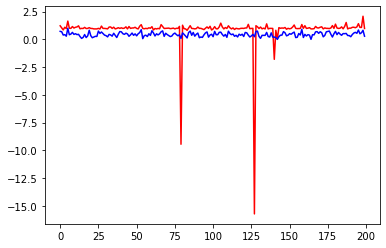

In [23]:
W = least_square(X_train, y_train)
y_pre = predict(X_test, W)
plt.plot(y_pre, 'r')
plt.plot(y_test, 'b')
print(W)

## Hyper-Parameters Tuning 

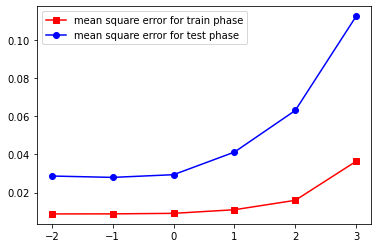

In [24]:
landa = [0.01, 0.1, 1, 10, 100, 1000]
mse_tr = deque()
mse_te = deque()
for l in landa:
    W = l2_regularization(X_train, y_train, landa=l)
    y_pre_te = predict(X_test, W)
    y_pre_tr = predict(X_train, W)
    mse_tr.append(mse_error(y_pre_tr, y_train))
    mse_te.append(mse_error(y_pre_te, y_test))

plt.plot(np.log10(landa), mse_tr, 'r-s')
plt.plot(np.log10(landa), mse_te, 'b-o')
plt.legend(['mean square error for train phase', 'mean square error for test phase'])
plt.show()


## Regularized LS

[[ 0.78827958]
 [-0.27551742]
 [ 0.29280727]
 [-0.8918014 ]
 [ 0.0025599 ]
 [-0.11364186]
 [ 0.01114317]
 [-0.04215351]
 [-0.02522852]
 [-0.01296883]
 [-0.02073685]
 [ 0.03223798]
 [ 0.02039231]
 [ 0.08383616]
 [ 0.07399691]
 [ 0.13145445]]


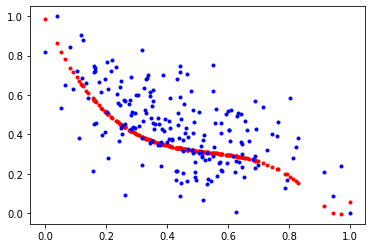

In [25]:
landa = 0.01
W_ls = least_square(X_train, y_train)
W_re = l2_regularization(X_train, y_train, landa=landa)
y_pre_te_r = predict(X_test, W_re)
y_pre_te_ls = predict(X_test, W_ls)
plt.plot(X_test[:,1], y_pre_te_r, 'r.')
plt.plot(X_test[:,1], y_test, 'b.')
# plt.plot(X_test[:,1], y_pre_te_ls, 'k.')
print(W_re)